<a href="https://colab.research.google.com/github/SuryaTeja-aiml/2024-StatMLAssignments/blob/main/2303A52007_StatMLAssignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

https://www.kaggle.com/datasets/kellistephenson/increasing-breast-cancer-awareness
1. Read the data with pandas and find features and target variables
2. Find target variable
3. Train SVM, KNN, Logistic regression and find accuracy
4. Draw bootstrapping plots for each model

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv("breast_cancer_survival.csv")
print(data.head())

   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18          26-Au

In [51]:
data.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [52]:
data['Surgery_type'].unique()

array(['Other', 'Lumpectomy', 'Modified Radical Mastectomy',
       'Simple Mastectomy'], dtype=object)

In [53]:
data['Histology'].unique()

array(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mucinous Carcinoma'], dtype=object)

In [67]:
data.replace('FEMALE',0, inplace=True)
data.replace('MALE',1, inplace=True)
data.replace('Positive',1, inplace=True)
data.replace('Negative',0, inplace=True)
data.replace('Dead',0, inplace=True)
data.replace('Alive',1, inplace=True)
data.replace('I',1, inplace=True)
data.replace('II',2, inplace=True)
data.replace('III',3, inplace=True)
data.replace('Infiltrating Ductal Carcinoma',1, inplace=True)
data.replace('Infiltrating Lobular Carcinoma',2, inplace=True)
data.replace('Mucinous Carcinoma',3, inplace=True)
data.replace('Other',0, inplace=True)
data.replace('Lumpectomy',1, inplace=True)
data.replace('Modified Radical Mastectomy',2, inplace=True)
data.replace('Simple Mastectomy',3, inplace=True)

In [55]:
X=data.drop(['Patient_Status','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
y=data['Patient_Status']
X.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
0,42,0,0.95256,2.15000,0.007972,-0.048340,2,1,1,1,0,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,2,1,1,1,0,0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,2,1,1,1,0,1
3,78,0,-0.87618,0.12943,-0.370380,0.132190,1,1,1,1,0,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,2,1,1,1,1,1


In [56]:
y.head()

,Patient_Status
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [57]:
y.isnull().sum()
y.fillna(0,inplace=True)

In [58]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X,y=smote.fit_resample(X,y)

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(408, 12) (102, 12) (408,) (102,)


In [60]:
y.isnull().sum()

0

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.7156862745098039


In [63]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.6862745098039216


In [64]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")

Logistic Regression Accuracy: 0.6666666666666666


In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

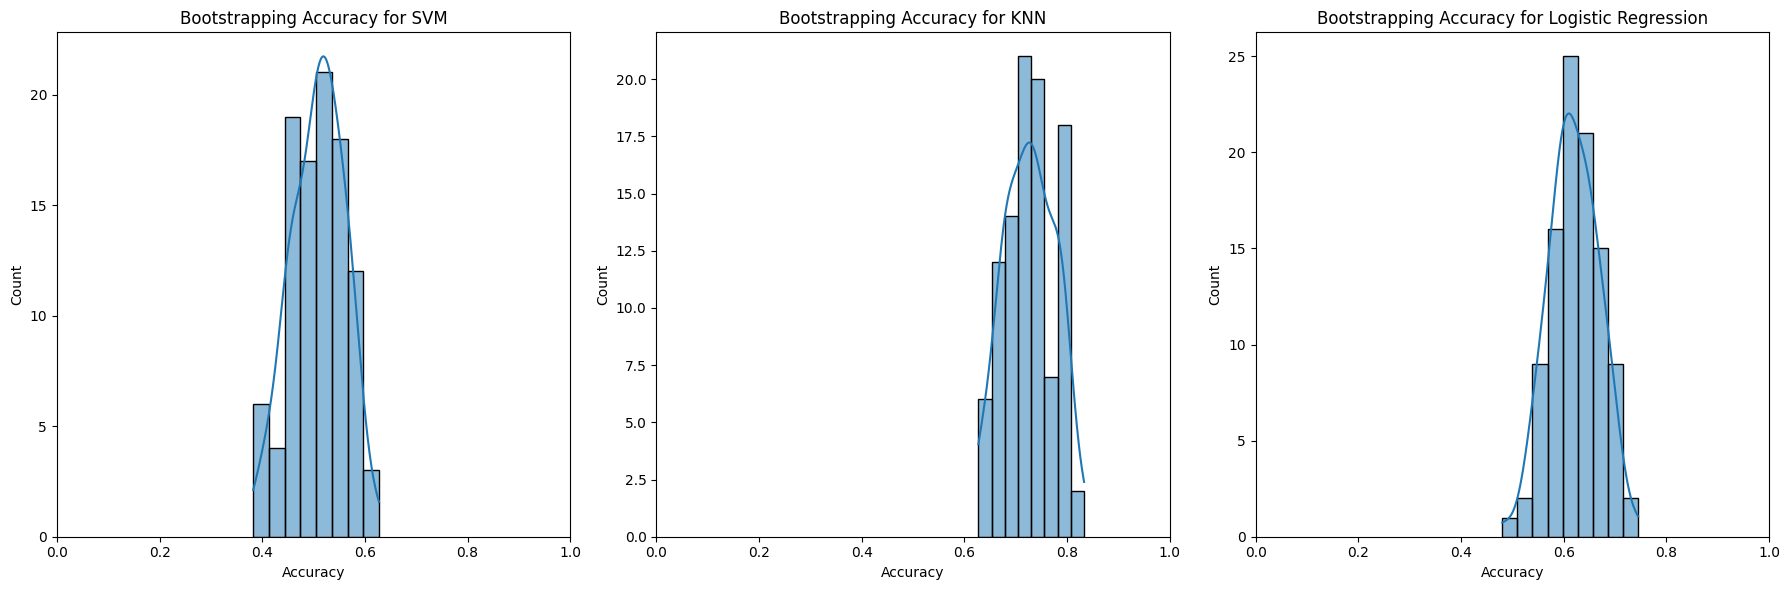

In [66]:
def bootstrap_accuracy(model, X, y, n_iterations=100):
    scores = []
    for _ in range(n_iterations):
        X_sample, y_sample = resample(X, y)
        X_train_boot, X_test_boot, y_train_boot, y_test_boot = train_test_split(X_sample, y_sample, test_size=0.2)
        model.fit(X_train_boot, y_train_boot)
        y_pred_boot = model.predict(X_test_boot)
        scores.append(accuracy_score(y_test_boot, y_pred_boot))
    return scores
models = {
    'SVM': svm,
    'KNN': knn,
    'Logistic Regression': log_reg
}
plt.figure(figsize=(18, 6))
for i, (name, model) in enumerate(models.items(), 1):
    scores = bootstrap_accuracy(model, X, y)
    plt.subplot(1, 3, i)
    sns.histplot(scores, kde=True)
    plt.title(f'Bootstrapping Accuracy for {name}')
    plt.xlabel('Accuracy')
    plt.xlim(0, 1)

plt.tight_layout()
plt.show()